# Autoencoder Demo

This is a demo that looks to create a simple stacked autoencoder in Keras. An autoencoder is a system that takes an input and tries to compress/reduce it down to a smaller representation. The compressed code is then expanded back out in a symettrical process to get back to the original image. By comparing the input and output and learning to minimise the loss (difference) between them, the neural networks learn how to encode the 'important' parts of the data.

(60000, 28, 28, 1)
(10000, 28, 28, 1)


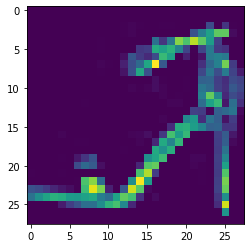

In [7]:
##### from tensorflow.keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the mnist fashion sample dataset
#(x_train, _), (x_test, _) = mnist.load_data()
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# scale the values down to 0..1 as they are currently 1-byte pixel intensity values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# reshape the data as the neural network expects a 4-Dimensional tensor of (samples, height, width, channels)
x_train = x_train.reshape((len(x_train), 28, 28, 1))
x_test = x_test.reshape((len(x_test), 28, 28, 1))

print(x_train.shape)
print(x_test.shape)

# Show a sample image (need to reshape back to lose the channel to display)
plt.imshow(x_train[8].reshape(28,28))

In [8]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential

# Create out autoencoder network
autoencoder = Sequential()

# Encoder layers
autoencoder.add(Conv2D(16, (3,3), activation='relu', padding='same', input_shape=x_train.shape[1:]))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(8, (3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
autoencoder.add(Conv2D(4, (3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2,2), padding='same'))
                
# Decoder layers
autoencoder.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(16, (3, 3), activation='relu'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

# Compile the network
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 4)           292       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 4)           0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 4)          

In [9]:
# Fit the network. We use 10 epochs here, increase to 100 if you want better results, but will take longer to train 

history = autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test, x_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 15s 256us/sample - loss: 0.3309 - val_loss: 0.3067
Epoch 2/10
60000/60000 [==============================] - 15s 242us/sample - loss: 0.3006 - val_loss: 0.2996
Epoch 3/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.2957 - val_loss: 0.2960
Epoch 4/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2930 - val_loss: 0.2939
Epoch 5/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2914 - val_loss: 0.2928
Epoch 6/10
60000/60000 [==============================] - 15s 244us/sample - loss: 0.2903 - val_loss: 0.2918
Epoch 7/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.2896 - val_loss: 0.2911
Epoch 8/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.2889 - val_loss: 0.2909
Epoch 9/10
60000/60000 [==============================] - 15s 247us/sample - l

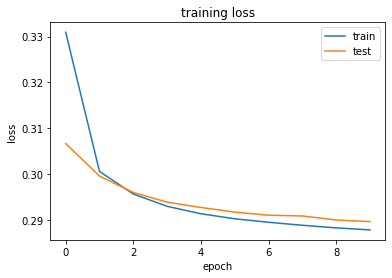

In [10]:
# plot the training losses

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

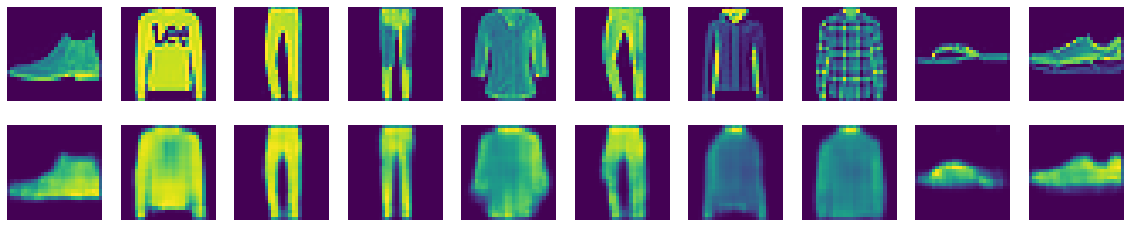

In [11]:
# Run some test images through the full autoencoder. What we get out will be the result of
# compressing then decompressing then again
decoded_imgs = autoencoder.predict(x_test)

# Plot some of the images so we can compare the input and output
n = 10
plt.figure(figsize=(20,4))

for i in range(n):
    # originals
    ax = plt.subplot(2, n, i + 1)
    ax.axis('off')
    plt.imshow(x_test[i].reshape(28,28))
    
    # outputs
    ax = plt.subplot(2, n, i + 1 + n)
    ax.axis('off')
    plt.imshow(decoded_imgs[i].reshape(28,28))
    
plt.show()